# A/B-тест крупного интернет-магазина.    
Есть список гипотез для увеличения выручки крупного интернет-магазина. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**В нашем распоряжении:**
- /datasets/hypothesis.csv - 9 гипотез по увеличению выручки интернет-магазина,
- /datasets/orders.csv -результаты A/B-теста,
- /datasets/visitors.csv -результаты A/B-теста.

**Цель исследования:**
1. Приоритизировать гипотезы,
2. Запустить A/B-тест,
3. Проанализировать результаты,
4. Подготовить список гипотез для увеличения выручки.

**Исследование пройдет в 4 шага:**       

**1 шаг.** [Подготовка данных](#one)   
  
**2 шаг.** [Приоритизация гипотез.](#two)    
    2.1 [Приоритизация гипотез с применением фреймворка ICE](#two1)        
    2.2 [Приоритизация гипотез с применением фреймворка RICE](#two2)     
    2.3 [Изменение приоритизации гипотез при применении RICE вместо ICE](#two3)   

**3 шаг.** [Анализ A/B-теста](#three)      
    3.1 [График кумулятивной выручки по группам](#three1)      
    3.2 [График кумулятивного среднего чека по группам](#three2)       
    3.3 [График относительного изменения кумулятивного среднего чека группы B к группе A. ](#three3)        
    3.4 [График кумулятивного среднего количества заказов на посетителя по группам](#three4)   
    3.5 [График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.](#three5)    
    3.6 [Точечный график количества заказов по пользователям.](#three6)    
    3.7 [95-й и 99-й перцентили количества заказов на пользователя.](#three7)    
    3.8 [Точечный график стоимостей заказов](#three8)   
    3.9 [95-й и 99-й перцентили стоимости заказов](#three9)    
    3.10 [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.](#three10)    
    3.11 [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#three11)     
    3.12 [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.](#three12)      
    3.13 [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#three13)   
         
**4 шаг.** [Общий вывод](#four)

# <a id="one"></a> **1 шаг.** Подготовка данных

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb 
import scipy.stats as stats

In [2]:
try:
    hypothesis, orders, visitors = (
                            pd.read_csv('hypothesis.csv'),
                            pd.read_csv('orders.csv'),
                            pd.read_csv('visitors.csv')
                            )
except:
    hypothesis, orders, visitors = (
                            pd.read_csv('/datasets/hypothesis.csv'),
                            pd.read_csv('/datasets/orders.csv'),
                            pd.read_csv('/datasets/visitors.csv')
                            )
pd.set_option('display.max_colwidth', 255)

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Структура hypothesis:   
`Hypothesis` — краткое описание гипотезы;       
`Reach` — охват пользователей по 10-балльной шкале;   
`Impact` — влияние на пользователей по 10-балльной шкале;    
`Confidence` — уверенность в гипотезе по 10-балльной шкале;    
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

In [4]:
#приведем к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# проверяем пропуски
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [7]:
print('Количество дубликатов в таблице hypothesis:',hypothesis.duplicated().sum())

Количество дубликатов в таблице hypothesis: 0


In [8]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Структура orders:    
`transactionId` — идентификатор заказа;     
`visitorId` — идентификатор пользователя, совершившего заказ;    
`date` — дата, когда был совершён заказ;    
`revenue` — выручка заказа;    
`group` — группа A/B-теста, в которую попал заказ.   

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# меняем тип данных у столбца date на тип дата 
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
# проверяем пропуски
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
# проверяем дубликаты
print('Количество дубликатов в таблице orders:', orders.duplicated().sum())

Количество дубликатов в таблице orders: 0


In [14]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Структура visitors:   
`date` — дата;    
`group` — группа A/B-теста;    
`visitors` — количество пользователей в указанную дату в указанной группе A/B-тест   

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
# меняем тип данных у столбца date на тип дата 
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
# проверяем пропуски
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [19]:
# проверяем дубликаты
print('Количество дубликатов в таблице visitors:',visitors.duplicated().sum())

Количество дубликатов в таблице visitors: 0


**Вывод по шагу №1: Подготовка данных**

Структура hypothesis:   
`Hypothesis` — краткое описание гипотезы;       
`Reach` — охват пользователей по 10-балльной шкале;   
`Impact` — влияние на пользователей по 10-балльной шкале;    
`Confidence` — уверенность в гипотезе по 10-балльной шкале;    
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.    

Структура orders:    
`transactionId` — идентификатор заказа;     
`visitorId` — идентификатор пользователя, совершившего заказ;    
`date` — дата, когда был совершён заказ;    
`revenue` — выручка заказа;    
`group` — группа A/B-теста, в которую попал заказ.    

Структура visitors:   
`date` — дата;    
`group` — группа A/B-теста;    
`visitors` — количество пользователей в указанную дату в указанной группе A/B-тест   

 В данном разделе мы:
- Названия столбцов привели к нижнему регистру
- Все столбцы с датами перевели на формат datetime
- Дубликатов и пропусков не обнаружили

# **2 шаг.** <a id="two"></a> Приоритизация гипотез.

## 2.1 <a id="two1"></a> Приоритизация гипотез с применением фреймворка ICE

Формула: `ICE score = (Impact x Confidence) / Efforts`

In [20]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis.sort_values(by = 'ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


## 2.2 <a id="two2"></a>Приоритизация гипотез с применением фреймворка RICE

Формула: `RICE score = (Reach x Impact x Confidence) / Efforts`

In [21]:
hypothesis['rice'] = (hypothesis['reach'] *hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis.sort_values(by = 'rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


## 2.3 <a id="two3"></a>Изменение приоритизации гипотез при применении RICE вместо ICE


 ICE (влияние, уверенность, усилия) — один из самых популярных способов приоритизации задач.
 
$ICE score = (Impact*Confidence) / Efforts$    

 У этого метода есть модификация RICE (влияние, уверенность, усилия, охват)   
  
$RICE score = (Reach * Impact * Confidence) / Efforts$    

 Фреймворк RICE состоит из четырёх компонент:   
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

Параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10.  

Параметр RICE в отличие от ICE учитывает охват. Если охват низкий, то RICE падает.И наоборот.

Рассмотрим лидеров

- "Запустить акцию, дающую скидку на товар в день рождения" Самый высокий ICE. Но охват всего лишь 1 (видиом связно с тем, что день рождения раз в году). Поэтому по параметру RICE 5 место 

- " Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". Хорошие показатели RICE (3 место) и ICE (2 место). Минус что по охвату стоит 3, что низкий показатель.

- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 1 место по RICE и 3 место по ICE. По Матрице Эйзенхауэра ее можно включить в гипотезы квадранта A (важные и срочные) 

- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	" 5 место по ICE и 2  место по  RICE. Не затратный способ, который не принесет большого удовлетворения пользователей, но охватит большой круг

# **3 шаг.** <a id="three"></a> Анализ A/B-теста

In [22]:
print('Группе А в таблице orders:' ,  orders.query('group == "A"').shape[0])
print('Группе B в таблице orders:' , orders.query('group == "B"').shape[0])
print('Всего строк в таблице orders:' , orders['group'].shape[0])
print('Уникальные значения в таблице orders:', orders['group'].unique())
print('Разница между группой А и В:', orders.query('group == "B"').shape[0]- orders.query('group == "A"').shape[0])


Группе А в таблице orders: 557
Группе B в таблице orders: 640
Всего строк в таблице orders: 1197
Уникальные значения в таблице orders: ['B' 'A']
Разница между группой А и В: 83


In [23]:
print('Пользователи из группы А, сделавшие заказы:' ,  orders.query('group == "A"')['visitorId'].unique().shape[0])
print('Пользователи из группы В, сделавшие заказы:' ,  orders.query('group == "B"')['visitorId'].unique().shape[0])
print('Разница между группой А и В:', orders.query('group == "B"')['visitorId'].unique().shape[0]-orders.query('group == "A"')['visitorId'].unique().shape[0])


Пользователи из группы А, сделавшие заказы: 503
Пользователи из группы В, сделавшие заказы: 586
Разница между группой А и В: 83


In [24]:
dubl=orders.pivot_table(index='visitorId', values= 'group', aggfunc = 'nunique').reset_index()

print('Число пользователей, находящихся в 2 группах одновременно: ' ,dubl.query('group == 2')['visitorId'].count())

Число пользователей, находящихся в 2 группах одновременно:  58


In [25]:
# Исключим этих пользователей
dubl_list = list(dubl[dubl.group == 2]['visitorId'])
orders = orders.query('visitorId not in @dubl_list')

In [26]:
dubl_2=orders.pivot_table(index='visitorId', values= 'group', aggfunc = 'nunique').reset_index()

print('Число пользователей, находящихся в 2 группах одновременно: ' ,dubl_2.query('group == 2')['visitorId'].count())

Число пользователей, находящихся в 2 группах одновременно:  0


In [27]:
print('Дата начала теста:',orders['date'].min())
print('Дата окончания теста:',orders['date'].max())

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [28]:
print('Группе А в таблице orders:' ,  orders.query('group == "A"').shape[0])
print('Группе B в таблице orders:' , orders.query('group == "B"').shape[0])
print('Всего строк в таблице orders:' , orders['group'].shape[0])
print('Уникальные значения в таблице orders:', orders['group'].unique())
print('Разница между группой А и В:', orders.query('group == "B"').shape[0]- orders.query('group == "A"').shape[0])

Группе А в таблице orders: 468
Группе B в таблице orders: 548
Всего строк в таблице orders: 1016
Уникальные значения в таблице orders: ['B' 'A']
Разница между группой А и В: 80


In [29]:
print('Пользователи из группы А, сделавшие заказы:' ,  orders.query('group == "A"')['visitorId'].unique().shape[0])
print('Пользователи из группы В, сделавшие заказы:' ,  orders.query('group == "B"')['visitorId'].unique().shape[0])
print('Разница между группой А и В:', orders.query('group == "B"')['visitorId'].unique().shape[0]-orders.query('group == "A"')['visitorId'].unique().shape[0])

Пользователи из группы А, сделавшие заказы: 445
Пользователи из группы В, сделавшие заказы: 528
Разница между группой А и В: 83


Вывод:   
- Есть 2 группы : А и В
    
- Дата начала теста 1 августа 2019год. Дата окончание теста 31 августа 2019 год. Период: 31 день
    
- в группе А: 445 пользователей, которые сделали заказ. В группе B: 528 пользователей, которые сделали заказ.В группе В на 80 пользователей больше, чем в группе А.
    
- Число пользователей, находящихся в 2 группах одновременно:58. Приняла решение, не учитывать этих пользователей при оценке A/B-теста. 


## 3.1 <a id="three1"></a> График кумулятивной выручки по группам

In [30]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitorId': 'nunique',
            'transactionId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


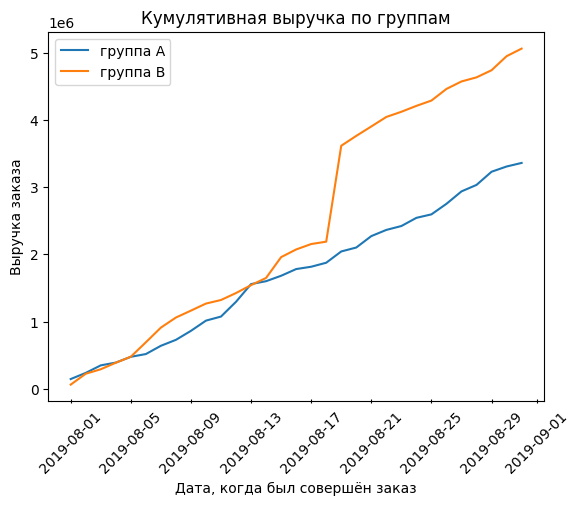

In [31]:
#  Настраиваем вид основных тиков:
fig, ax = plt.subplots()
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 45)    #  Поворот подписей

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel("Дата, когда был совершён заказ")
plt.ylabel("Выручка заказа")
plt.legend() 

У группы А и В рост выручки в течение всего теста. До 2019-08-17 у обоих групп равномерный рост (лидирует группа В). Затем у B произошел резкий скачок, который может быть связан с дорогим заказом.

## 3.2 <a id="three2"></a> График кумулятивного среднего чека по группам

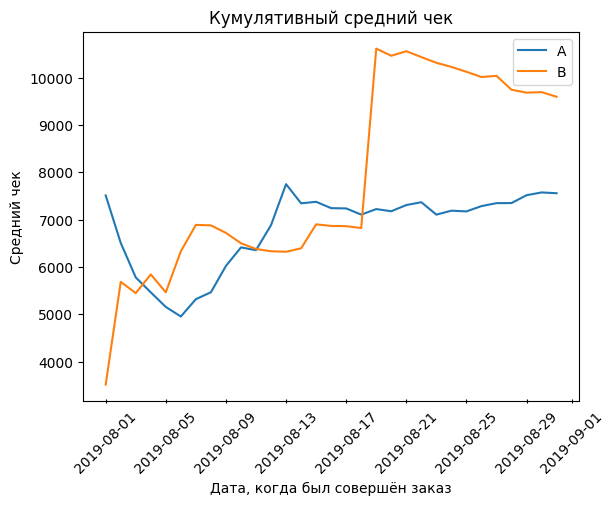

In [32]:
#  Настраиваем вид основных тиков:
fig, ax = plt.subplots()
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 45)    #  Поворот подписей
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек')
plt.xlabel("Дата, когда был совершён заказ")
plt.ylabel("Средний чек")
plt.legend() 

У группы В был резкий скачок 2019-08-07, что может быть связано с дорогим и крупным заказом.Дальше идет на спадение. У группы B идет сначала повышение, затем стабилизируется.

## 3.3 <a id="three3"></a> График относительного изменения кумулятивного среднего чека группы B к группе A.

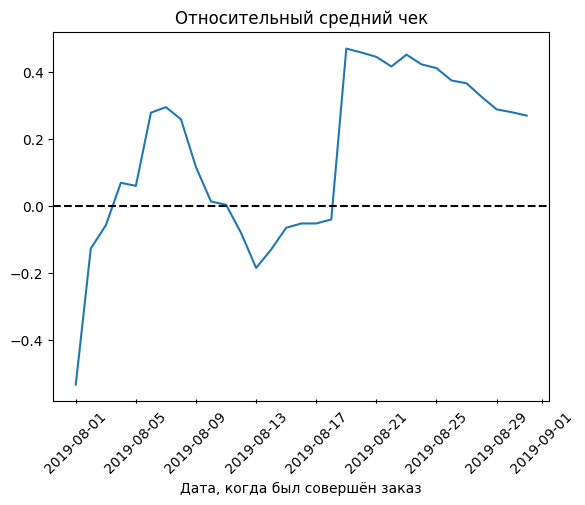

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#  Настраиваем вид основных тиков:
fig, ax = plt.subplots()
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 45)    #  Поворот подписей
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel("Дата, когда был совершён заказ")
plt.title('Относительный средний чек')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

 В начале идет рост, потом на спад (группа А в один момент превышала на 10%) и большой скачок 2019-08-17 подтверждает что был большой заказ в группе В. Затем стабильно группа B превышает больше чем на 20%

## 3.4 <a id="three4"></a> График кумулятивного среднего количества заказов на посетителя по группам

Text(0, 0.5, 'Конверсия')

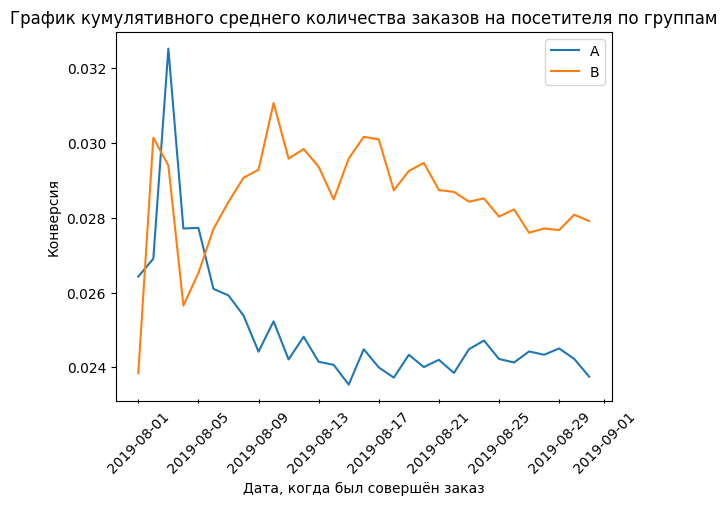

In [34]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#  Настраиваем вид основных тиков:
fig, ax = plt.subplots()
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 45)    #  Поворот подписей
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel("Дата, когда был совершён заказ")
plt.ylabel("Конверсия")


Первоначально конверсия колебалась, после девятого августа немного стабилизировалась.Результат у В выше чем у А.

## 3.5 <a id="three5"></a> График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Конверсия')

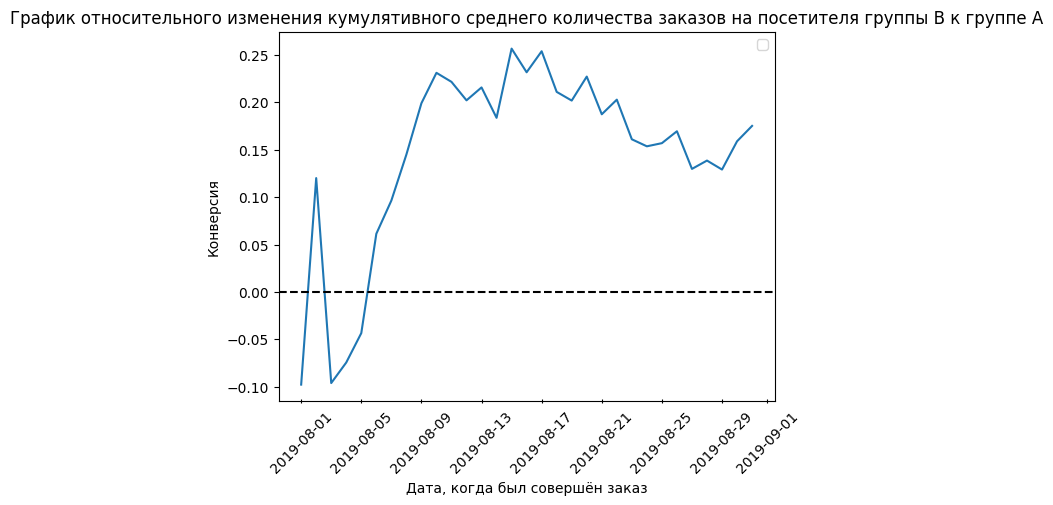

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#  Настраиваем вид основных тиков:
fig, ax = plt.subplots()
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               bottom = True,    #  Рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  Рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 45)    #  Поворот подписей
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel("Дата, когда был совершён заказ")
plt.ylabel("Конверсия")

Группа B вначале падает, но затем начинает лидировать относительно группы А. 

## 3.6 <a id="three6"></a> Точечный график количества заказов по пользователям.

Text(0, 0.5, 'Количество заказов')

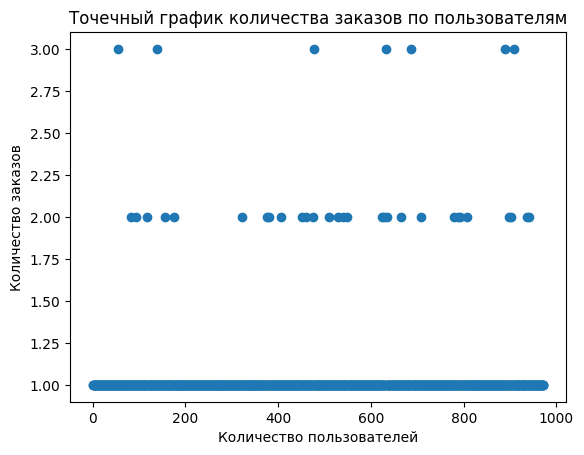

In [36]:

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers ['orders']) 

plt.title("Точечный график количества заказов по пользователям")
plt.xlabel('Количество пользователей')
plt.ylabel("Количество заказов")

Чаще всего делают один заказ.Пользователи, заказавшие более 2-х раз, совсем мало

## 3.7 <a id="three7"></a> 95-й и 99-й перцентили количества заказов на пользователя.

In [37]:
print ('95-й перцентиль количества заказов на пользователя: ', np.percentile(ordersByUsers['orders'], 95)) 
print ('99-й перцентиль количества заказов на пользователя: ', np.percentile(ordersByUsers['orders'], 99)) 

95-й перцентиль количества заказов на пользователя:  1.0
99-й перцентиль количества заказов на пользователя:  2.0


Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% пользователей оформляли больше чем 4 заказа


## 3.8 <a id="three8"></a>Точечный график стоимостей заказов

(0.0, 1300000.0)

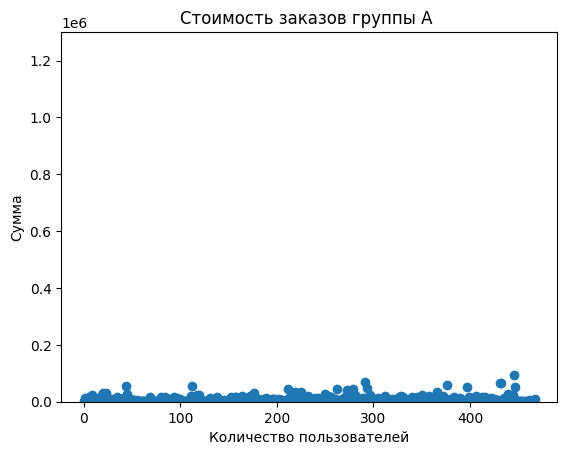

In [38]:
#по группе А
revenue_A = orders.query('group == "A"')['revenue']
x_values = pd.Series(range(0, len(revenue_A)))

plt.scatter(x_values, revenue_A) 
plt.title("Стоимость заказов группы А ")
plt.xlabel('Количество пользователей')
plt.ylabel("Сумма")
plt.ylim(0,1300000)

Text(0, 0.5, 'Сумма')

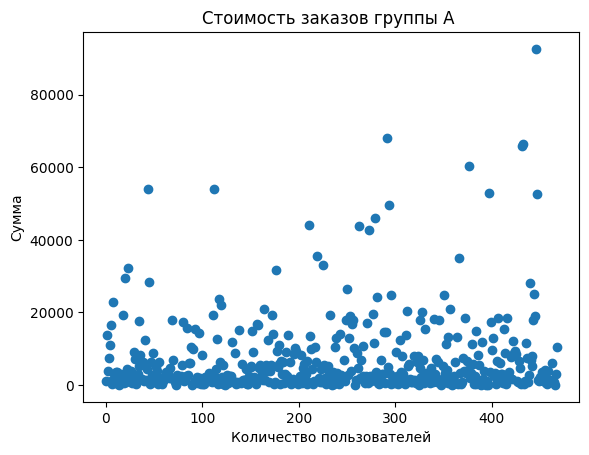

In [39]:

revenue_A = orders.query('group == "A"')['revenue']
x_values = pd.Series(range(0, len(revenue_A)))

plt.scatter(x_values, revenue_A) 
plt.title("Стоимость заказов группы А ")
plt.xlabel('Количество пользователей')
plt.ylabel("Сумма")



Text(0, 0.5, 'Сумма')

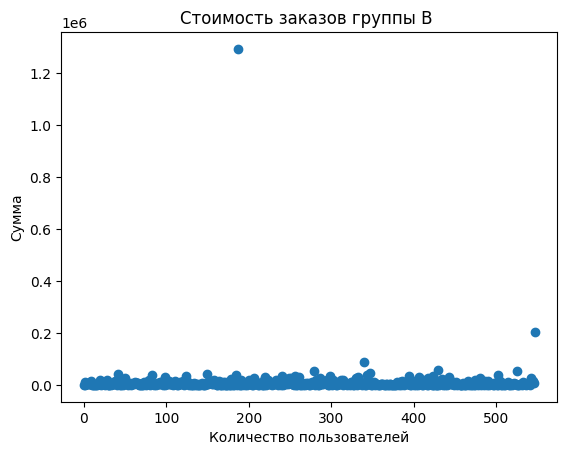

In [40]:
#по группе B
revenue_B = orders.query('group == "B"')['revenue']
x_values = pd.Series(range(0, len(revenue_B)))

plt.scatter(x_values, revenue_B) 

plt.title("Стоимость заказов группы B ")
plt.xlabel('Количество пользователей')
plt.ylabel("Сумма")

Text(0, 0.5, 'Сумма')

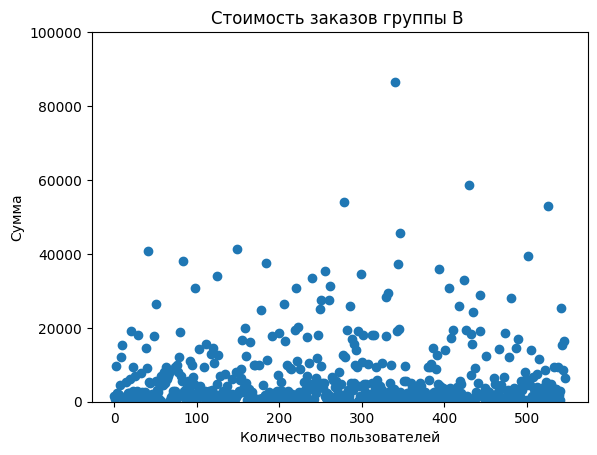

In [41]:
revenue_B = orders.query('group == "B"')['revenue']
x_values = pd.Series(range(0, len(revenue_B)))

plt.scatter(x_values, revenue_B) 
plt.ylim(0,100000)
plt.title("Стоимость заказов группы B ")
plt.xlabel('Количество пользователей')
plt.ylabel("Сумма")

У графика В нашелся заказ, который стоимостью выше 1,2 млн.руб. По остальным заказам и у группы А и В наблюдаются заказы не выше 100 тыс. руб 

## 3.9 <a id="three9"></a> 95-й и 99-й перцентили стоимости заказов

In [42]:
print ('95-й перцентиль стоимости заказов: ', round(np.percentile(revenue_A, 95),2)) 
print ('99-й перцентиль стоимости заказов: ', round(np.percentile(revenue_A, 99),2)) 

95-й перцентиль стоимости заказов:  24944.5
99-й перцентиль стоимости заказов:  56064.18


In [43]:
print ('95-й перцентиль стоимости заказов: ', round(np.percentile(revenue_B, 95),2)) 
print ('99-й перцентиль стоимости заказов: ', round(np.percentile(revenue_B, 99),2)) 

95-й перцентиль стоимости заказов:  27561.5
99-й перцентиль стоимости заказов:  49553.6


- По группе A не более 5% пользователей оформляли на сумму свыше 29944.5 руб  и не более 1% пользователей оформляли на сумму свыше 56064.18 руб.
- По группе В не более 5% пользователей оформляли на сумму свыше 27561.5 руб  и не более 1% пользователей оформляли на сумму свыше 49553.6 руб.

## 3.10 <a id="three10"></a> Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

 Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет. 
 
 Альтернативная гипотеза: различия в среднем между группами есть.

In [44]:

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
        pd.Series(0, index=np.arange
            (visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')])

sampleB = pd.concat([ordersByUsersB['orders'],
        pd.Series( 0,index=np.arange
            (visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB ['orders'])),name='orders')])


In [45]:
print('p_value:' "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем количестве заказов на посетителя между группами:'"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p_value:0.011
Относительное различие в среднем количестве заказов на посетителя между группами:0.160


Вывод: p-value меньше 0.05, и нулевую гипотезу о том, что различий в среднем количестве заказов на посетителя между группами нет, следует отвергнуть. Относительный выигрыш группы B равен 16%.

## 3.11 <a id="three11"></a> Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [46]:
print('p_value:' '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке заказа между группами:' '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p_value:0.829
Относительное различие в среднем чеке заказа между группами:0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

## 3.12 <a id="three12"></a> Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.


Приступаем к подготовке очищенных от аномалий данных.

In [47]:
ordersByUsersА = (
    orders.query('group == "A"').groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersА .columns = ['visitorId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsersА)))

ordersByUsersB = (
    orders.query('group == "B"').groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB .columns = ['visitorId', 'orders']


x_values = pd.Series(range(0, len(ordersByUsersB)))

In [48]:
A99=np.percentile(ordersByUsersА['orders'], [99])[0]
B99=np.percentile(ordersByUsersB['orders'], [99])[0]
rev_99=np.percentile(orders['revenue'], [99])[0]

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > A99]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > B99]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > rev_99]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномальных пользователей группы:', abnormalUsers.shape) 

Количество аномальных пользователей группы: (16,)


In [49]:
#У нас есть множество аномальных пользователей. 
#надо выяснить, есть ли существенные различия между группами с очищенными даннами 

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum()  - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p_value:''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем количестве заказов на посетителя между группами после очистки данных:''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p_value:0.007
Относительное различие в среднем количестве заказов на посетителя между группами после очистки данных:0.189


Результаты по среднему количеству заказов практически не изменились.

## 3.13 <a id="three13"></a> Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [50]:
print('p_value:' 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие в среднем чеке заказа между группами после очистки данных:' 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p_value:0.788
Относительное различие в среднем чеке заказа между группами после очистки данных:-0.032


 P-value увеличился. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по-прежнему нет.

# **4 шаг.** <a id="four"></a> Общий вывод

**Шаг №1: Подготовка данных**

Структура hypothesis:   
`Hypothesis` — краткое описание гипотезы;       
`Reach` — охват пользователей по 10-балльной шкале;   
`Impact` — влияние на пользователей по 10-балльной шкале;    
`Confidence` — уверенность в гипотезе по 10-балльной шкале;    
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.    

Структура orders:    
`transactionId` — идентификатор заказа;     
`visitorId` — идентификатор пользователя, совершившего заказ;    
`date` — дата, когда был совершён заказ;    
`revenue` — выручка заказа;    
`group` — группа A/B-теста, в которую попал заказ.    

Структура visitors:   
`date` — дата;    
`group` — группа A/B-теста;    
`visitors` — количество пользователей в указанную дату в указанной группе A/B-тест   

 В данном разделе мы:
- Названия столбцов привели к нижнему регистру
- Все столбцы с датами перевели на формат datetime
- Дубликатов и пропусков не обнаружили

**Шаг №2: Приоритизация гипотез.**       
    
Выделили 4 гипотезы, которые стоят для рассмотрения: 
- "Запустить акцию, дающую скидку на товар в день рождения" Самый высокий ICE. Но охват всего лишь 1 (видимо связно с тем, что день рождения раз в году). Поэтому по параметру RICE 5 место
- " Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". Хорошие показатели RICE (3 место) и ICE (2 место). Минус что по охвату стоит 3, что низкий показатель.
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 1 место по RICE и 3 место по ICE. По Матрице Эйзенхауэра ее можно включить в гипотезы квадранта A (важные и срочные)
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа " 5 место по ICE и 2 место по RICE. Не затратный способ, который не принесет большого удовлетворения пользователей, но охватит большой круг

**Шаг №3: Анализ A/B-теста.** 
- *Информация о АВ-тесте:*
    - Есть 2 группы : А и В
    - Дата начала теста 1 августа 2019год. Дата окончание теста 31 августа 2019 год. Период: 31 день
    - в группе А: 445 пользователей, которые сделали заказ. В группе B: 528 пользователей, которые сделали заказ.В группе В на 80 пользователей больше, чем в группе А.
    - Число пользователей, находящихся в 2 группах одновременно:58. Приняла решение, не учитывать этих пользователей при оценке A
- *График кумулятивной выручки по группам:*   
 У группы А и В рост выручки в течение всего теста. До 2019-08-17 у обоих групп равномерный рост (лидирует группа В). Затем у B произошел резкий скачок.
- *График кумулятивного среднего чека по группам:*      
У группы В был резкий скачок 2019-08-07, что может быть связано с дорогим и крупным заказом.Дальше идет на спадение. У группы B идет сначала повышение, затем стабилизируется.
-  *График относительного изменения кумулятивного среднего чека группы B к группе A:*     
В начале идет рост, потом на спад (группа А в один момент превышала на 10%) и большой скачок 2019-08-17 подтверждает что был большой заказ в группе В. затем стабильно группа B превышает больше чем на 20% 
- *График кумулятивного среднего количества заказов на посетителя по группам:*        
Первоначально конверсия колебалась, после девятого августа немного стабилизировалась.Результат у В выше чем у А.
- *График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:*        
Группа B вначале падает, но затем начинает лидировать относительно группы А. 
- *Точечный график количества заказов по пользователям:*       
Чаще всего делают один заказ.Пользователи, заказавшие более 2-х раз, совсем мало.
-  *95-й и 99-й перцентили количества заказов на пользователя:*   
Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% пользователей оформляли больше чем 4 заказа
-  *Точечный график стоимостей заказов:*     
У графика В нашелся заказ, который стоимостью выше 1,2 млн.руб. По остальным заказам и у группы А и В наблюдаются заказы не выше 100 тыс. руб
- *95-й и 99-й перцентили стоимости заказов:*    
   - По группе A не более 5% пользователей оформляли на сумму свыше 29944.5 руб и не более 1% пользователей оформляли на сумму свыше 56064.18 руб.
   - По группе В не более 5% пользователей оформляли на сумму свыше 27561.5 руб и не более 1% пользователей оформляли на сумму свыше 49553.6 руб
- *Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:*     
   - Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет.    
   - Альтернативная гипотеза: различия в среднем между группами есть.По «сырым» данным различий в среднем числе заказов групп A и B есть.      
Первое число — p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный проигрыш группы А равен 16% — второе число в выводе.
- *Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.*    
   - Нулевая гипотеза: различий в среднем чеке между группами нет.       
   - Альтернативная гипотеза: различия в среднем чеке между группами есть.      
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.
-  *Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.*    
В качестве границ для отсечения аномальных заказов использовали 99 перцентил.Результаты по среднему количеству заказов практически не изменились.
-  *Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.*    
P-value увеличился. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по-прежнему нет.



**Вывод:**
- Есть статистическая значимость различий в среднем количестве заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.
- Как по сырым, так и по данным без аномалий нет статистическая значимость различий в среднем чеке заказа между группами.
- Графики сообщают, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.
- Останавливаем  тест, зафиксируем победу группы В
